<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [3]:
yelp.shape

(10000, 9)

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [5]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import os 
from collections import Counter
import re
 

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

C:\Users\WIN 10\Anaconda3\envs\unit-4\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [6]:
#STOPWORDS = set(STOPWORDS).union(set(['tablet']))
def tokenize(text):
    return([token for token in simple_preprocess(text) if token not in STOPWORDS])

In [7]:
yelp['tokens'] = yelp.text.apply(lambda x: tokenize(x))
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, lo..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[came, lunch, togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[ve, vegas, dozens, times, stepped, foot, circ..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[went, night, closed, street, party, best, act..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[stars, bad, price, lunch, seniors, pay, eatin..."


In [55]:
yelp = yelp.drop([6311])

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [56]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.98, ngram_range=(1,2))


In [58]:
dtm = tfidf.fit_transform(yelp.text) 

In [59]:
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
dtm.head()

,,definitely,food,get,good,great,order,service,$,1,...,well,wife,will,wine,wish,wonderful,work,worth,wrong,year
0,0.298105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146361,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.144529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189225,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108898
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.389419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [60]:
from sklearn.neighbors import NearestNeighbors

kdtree  = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
kdtree.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [61]:
query = ['I am writing this becuase of the conduct of the emplyees. They could not be more rude and unprofessional. The tryed to ask one of the men for assistance when I noticed he is talking on the phone on duty, he rudely told me to ask someone else on duty. Despite the good reviews on Google and other websites, my experience here was very short and unfriendlyI had called prior to coming in; Over the phone I spoke with somebody named Jr. We spoke and I told him I was interested in test driving a car they had on their website. He was friendly over the phone and we decided on a time to meet. When I got there, I talked to this old guy and asked if Jr. was around. He was very rude in assisting me.I got my coffee and no thank you or anything from any of the two that served me. I sat down and found out there was wi-fi. This rudeness and incompetence seems to be a pattern in this town and it spreads everywhere.']
query_trans = tfidf.transform(query)

In [62]:
res = kdtree.kneighbors(query_trans.todense())

In [63]:
res

(array([[0.81877839, 1.        , 1.        , 1.00086212, 1.01679429,
         1.04831278, 1.05359358, 1.0554316 , 1.05794256, 1.07446938]]),
 array([[ 284, 3520, 4839, 4491, 1704, 3427, 8034, 1120, 4913, 1471]],
       dtype=int64))

In [69]:
num = 0
for i in res[1][0]:
    num = num + 1
    print(f"-----------{num}--------------")
    print(yelp.text[i])
    print("")

-----------1--------------
Despite the good reviews on Google and other websites, my experience here was very short and unfriendly. I had called prior to coming in; Over the phone I spoke with somebody named Jr. We spoke and I told him I was interested in test driving a car they had on their website. He was friendly over the phone and we decided on a time to meet. When I got there, I talked to this old guy and asked if Jr. was around. He was very rude in assisting me. I asked him if Jr. was around because I had an appointment with him. I don't know why, but he was very stubborn although the we had just met. I had to ask him 3 times to get him to respond. It turns out that Jr. had already left, even though we had already agreed to meet at that time. It was very unprofessional to have someone drive out to meet them and not be there at all. Since he wasn't there I asked if there was anyone else I could talk to because I really wanted to test drive the car. He said no, that I would have to

### Results Overview

Thre results seam very good. It picked up on the fact that the service was bad, there was a phone call in the review and the review was overall negative.

I did find that if I wrote a short review the results would have some in Russian, Spanish, and Mandarin



## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch



In [74]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC, NuSVC

LSVC = LinearSVC()

In [81]:
rfc = RandomForestClassifier()

In [75]:
def model(model):
    vect = TfidfVectorizer(stop_words='english')
    clf = model

    pipe = Pipeline([('vect', vect), ('clf', clf)])

    param = {
        'vect__max_df': (0.2,0.5,0.75, 1.0),
        'vect__min_df': (.02,.035, .05, .1),
        'vect__max_features': (100, 250, 500,1000,1250),

       # 'clf__max_leaf_nodes': (None,2,3,4,5,7,8,9,10)

    }
    grid_search = GridSearchCV(pipe,param, cv=8, n_jobs=-1, verbose=1)
    grid_search.fit(yelp.text, yelp.stars)    
    return(grid_search)

In [76]:
grid_search = model(LSVC)

Fitting 8 folds for each of 80 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  4.9min finished


In [77]:
grid_search.best_score_

0.5953595359535954

In [78]:
pred = grid_search.predict(query)

In [80]:
pred

array([5], dtype=int64)

In [82]:
rfc_test = model(rfc)
r

Fitting 8 folds for each of 80 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  6.3min finished
C:\Users\WIN 10\Anaconda3\envs\unit-4\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AttributeError: 'RandomForestClassifier' object has no attribute 'best_score_'

In [84]:
rfc_test.best_score_

0.5446544654465446

In [85]:
rfc_test.predict(query)

array([4], dtype=int64)

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [86]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

In [89]:
def tokenize(text):
    return([token for token in simple_preprocess(text) if token not in STOPWORDS])

def doc_stream(text):
    for f in text:
        tokens = tokenize(str(f))
        yield tokens

Learn the vocubalary of the yelp data:

In [90]:
id2word = corpora.Dictionary(doc_stream(yelp.text.values))

Create a bag of words representation of the entire corpus

In [91]:
corpus =  [id2word.doc2bow(text) for text in doc_stream(yelp.text.values)]

Your LDA model should be ready for estimation: 

In [96]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=8,
                   num_topics = 5# You can change this parameter
                  )

In [97]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
for t in topics: 
    print(t)
    print("\n")

great food good place like


good place food great service


food good place like service


place food great good service


place food great good like




Create 1-2 visualizations of the results

In [98]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\WIN 10\Anaconda3\envs\unit-4\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.000162  0.000423       1        1  20.308809
3      0.001422 -0.002171       2        1  20.004595
0     -0.003573 -0.003060       3        1  19.984623
4      0.004382  0.000336       4        1  19.927944
2     -0.002068  0.004471       5        1  19.774033, topic_info=     Category         Freq        Term        Total  loglift  logprob
208   Default  4071.000000       great  4071.000000  30.0000  30.0000
651   Default  1382.000000  restaurant  1382.000000  29.0000  29.0000
75    Default  1964.000000         got  1964.000000  28.0000  28.0000
133   Default  4577.000000       place  4577.000000  27.0000  27.0000
351   Default  1393.000000        come  1393.000000  26.0000  26.0000
144   Default  4810.000000        food  4810.000000  25.0000  25.0000
45    Default  3500.000000     service  3500.000000  24.0000  24.0000
131   Default  1355.000000      people  1355.000000  23.0000  23.0000
122   Default  1656.000000        best  1656.000000  22.0000  22.0000
165   Default   852.000000       think   852.000000  21.0000  21.0000
310   Default  1366.000000         try  1366.000000  20.0000  20.0000
18    Default  3375.000000        like  3375.000000  19.0000  19.0000
34    Default  3267.000000        time  3267.000000  18.0000  18.0000
265   Default   416.000000         far   416.000000  17.0000  17.0000
108   Default   922.000000        sure   922.000000  16.0000  16.0000
94    Default   904.000000       night   904.000000  15.0000  15.0000
581   Default   510.000000      friend   510.000000  14.0000  14.0000
46    Default  1515.000000       staff  1515.000000  13.0000  13.0000
137   Default   912.000000         bar   912.000000  12.0000  12.0000
763   Default   388.000000         won   388.000000  11.0000  11.0000
37    Default  1472.000000        came  1472.000000  10.0000  10.0000
661   Default   720.000000      drinks   720.000000   9.0000   9.0000
387   Default  1494.000000       order  1494.000000   8.0000   8.0000
599   Default   446.000000      review   446.000000   7.0000   7.0000
526   Default   925.000000        told   925.000000   6.0000   6.0000
180   Default  1212.000000        menu  1212.000000   5.0000   5.0000
689   Default   410.000000        town   410.000000   4.0000   4.0000
313   Default  1009.000000        want  1009.000000   3.0000   3.0000
25    Default   835.000000     minutes   835.000000   2.0000   2.0000
798   Default   546.000000        free   546.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
185    Topic5    63.436996       space   233.430832   0.3180  -7.3117
40     Topic5   987.705505        good  4555.338379   0.0921  -4.5664
381    Topic5   319.582520      little  1338.702148   0.1884  -5.6948
387    Topic5   351.619324       order  1494.918213   0.1735  -5.5992
1277   Topic5   310.751007     chicken  1340.339600   0.1591  -5.7228
18     Topic5   713.280823        like  3375.517090   0.0664  -4.8919
1066   Topic5   258.852325         new  1111.435303   0.1637  -5.9055
371    Topic5   213.687729       fresh   902.379517   0.1803  -6.0973
85     Topic5   179.063080        long   742.617065   0.1984  -6.2740
246    Topic5   234.898651       right  1015.591187   0.1567  -6.0026
651    Topic5   305.399475  restaurant  1382.677246   0.1106  -5.7402
45     Topic5   642.607544     service  3500.611816  -0.0744  -4.9962
92     Topic5   344.298462        nice  1658.380859   0.0487  -5.6203
122    Topic5   336.676392        best  1656.206665   0.0276  -5.6427
133    Topic5   738.171631       place  4577.951172  -0.2040  -4.8576
358    Topic5   286.585266  definitely  1389.212402   0.0423  -5.8037
180    Topic5   254.520081        menu  1212.104004   0.0601  -5.9224
46     Topic5   292.046539       staff  1515.029663  -0.0255  -5.7849
156    Topic5   222.316193      pretty  1029.461914   0.0881  -6.0577
34     To

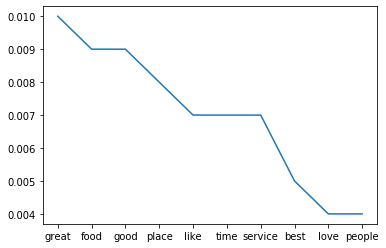

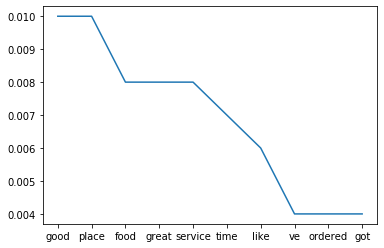

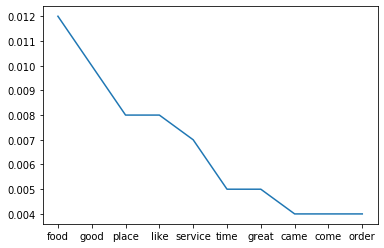

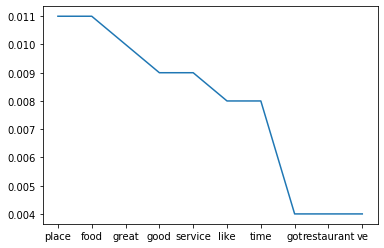

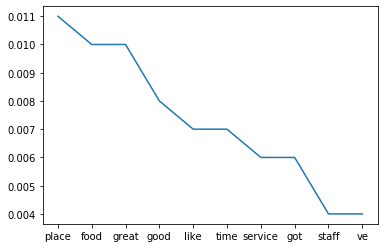

In [102]:
scores = [re.findall(r"\d+\.\d+", t[1]) for t in lda.print_topics()]

import matplotlib.pyplot as plt

for i in range(len(words)):
    ys = [float(li) for li in scores[i]]
    plt.plot(words[i], ys)
    plt.show()

In [104]:
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')
    
wc = count(yelp['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
150,food,3363,5071,1.0,0.010554,0.010554,0.336334
125,place,3385,4832,2.0,0.010056,0.020610,0.338534
46,good,3228,4806,3.0,0.010002,0.030612,0.322832
232,great,3101,4297,4.0,0.008943,0.039555,0.310131
40,service,2987,3695,5.0,0.007690,0.047245,0.298730


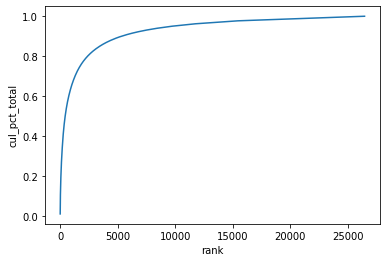

In [105]:
import seaborn as sns


sns.lineplot(x='rank', y='cul_pct_total', data=wc);

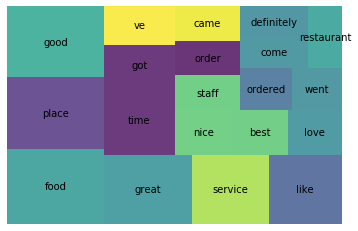

In [106]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [111]:
wc = count(yelp[yelp['stars'] == 1].tokens)
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
66,service,530,771,1.0,0.008861,0.008861,0.354278
427,food,408,708,2.0,0.008137,0.016997,0.272727
8,time,423,675,3.0,0.007757,0.024755,0.282754
42,place,462,665,4.0,0.007643,0.032397,0.308824
30,like,437,631,5.0,0.007252,0.039649,0.292112


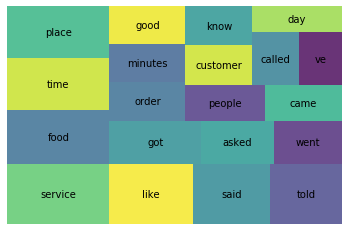

In [112]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [114]:
import warnings
warnings.filterwarnings('ignore')


id2word = corpora.Dictionary(doc_stream(yelp.text.values))
corpus =  [id2word.doc2bow(text) for text in doc_stream(yelp[yelp['stars'] == 1].text.values)]
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=8,
                   num_topics = 5# You can change this parameter
                  )

In [115]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
for t in topics: 
    print(t)
    print("\n")

service like told place time said asked food know order


time like service place food got said told went people


food time service got like place order said told people


food service said time place like got told called ve


service place food time said told like got asked good




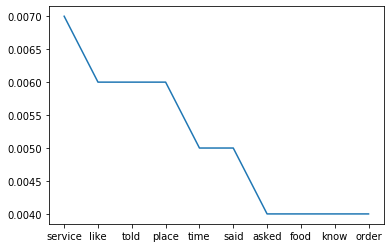

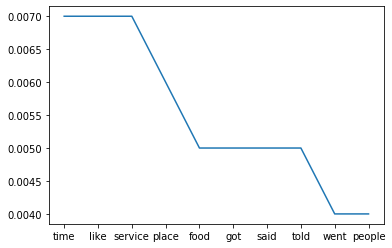

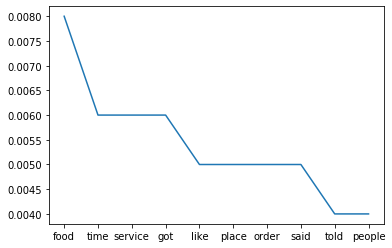

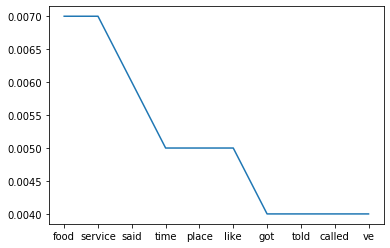

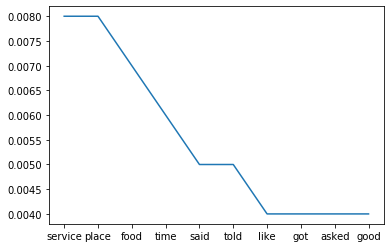

In [116]:
scores = [re.findall(r"\d+\.\d+", t[1]) for t in lda.print_topics()]

import matplotlib.pyplot as plt

for i in range(len(words)):
    ys = [float(li) for li in scores[i]]
    plt.plot(words[i], ys)
    plt.show()

## Overview

One of the main things that I have noticed while using NLP to look at reviews is that context really matters. The frequently used words throughout all reviews are very similar. 
When looking at the difference of one-star reviews and five-star reviews, the main difference is a lack of the word “good” and “great”. You will see more words like “said”, “told”, “asked”, “called” and “got” due to the fact that people are describing an experience they had.

It seems that the NearestNeighbor model works very well when looking at reviews.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)